In [208]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from category_encoders import OrdinalEncoder
from sklearn.feature_selection import r_regression

df_cable = pd.read_excel("../data/raw/glaad/cable.xlsx")
df_cable = df_cable.rename(columns={'Unnamed: 0': 'index'})
df_cable["index"] = df_cable["index"].str.replace(" Characters", "")

df_streaming = pd.read_excel("../data/raw/glaad/streaming.xlsx")
df_streaming = df_streaming.rename(columns={'Unnamed: 0': 'Characters'})
df_streaming["Characters"] = df_streaming["Characters"].str.replace(" Characters", "")

# Cable TV Linear Regression

## Cleaning

In [209]:
# Cleaning and transforming the data 
cable = df_cable.T
new_header = cable.iloc[0] #grab the first row for the header
cable = cable[1:] #take the data less the header row
cable.columns = new_header #set the header row as the df header
cable = cable.reset_index()
cable = cable.rename(columns={'index':'Year'})

[Text(0.5, 1.0, 'Transgendered Characters on Cable TV')]

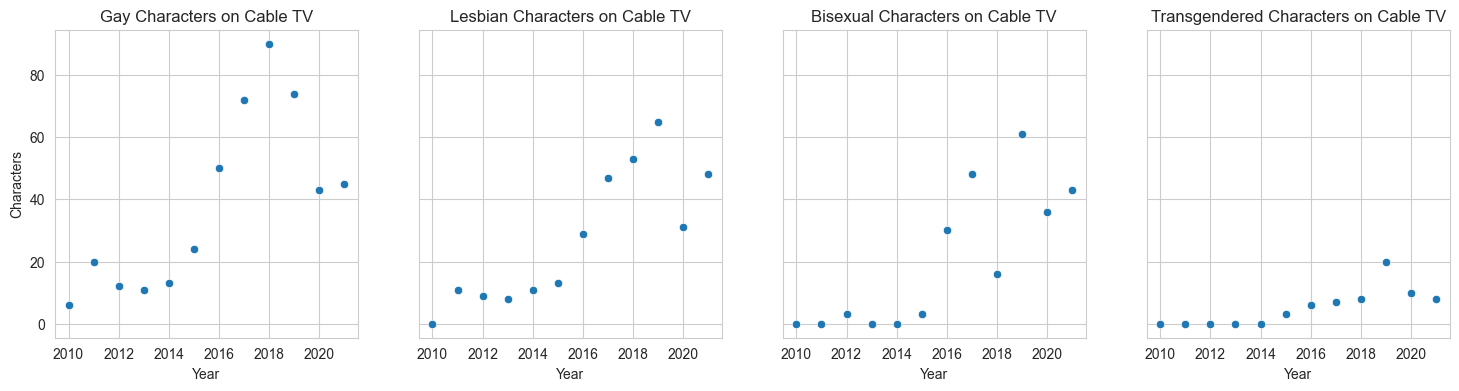

In [210]:
# Plotting the data
sns.set_style("whitegrid")
fig, axes = plt.subplots(ncols=4,nrows=1, figsize=(18,4), sharey=True)
sns.scatterplot(x=cable["Year"], y=cable["Gay"], ax=axes[0]).set(title='Gay Characters on Cable TV', ylabel='Characters')
sns.scatterplot(x=cable["Year"], y=cable["Lesbian "], ax=axes[1]).set(title='Lesbian Characters on Cable TV')
sns.scatterplot(x=cable["Year"], y=cable["Bisexual"], ax=axes[2]).set(title='Bisexual Characters on Cable TV')
sns.scatterplot(x=cable["Year"], y=cable["Transgendered"], ax=axes[3]).set(title='Transgendered Characters on Cable TV')

In [211]:
# Changing the dataset data types
cable['Year'] = cable['Year'].astype("object")
cable['Gay'] = cable['Gay'].astype("int64")
cable['Bisexual'] = cable['Bisexual'].astype("int64")
cable['Transgendered'] = cable['Transgendered'].astype("int64")
cable['Lesbian '] = cable['Lesbian '].astype("int64")

In [212]:
# Encoding the Year
encoder = OrdinalEncoder()
a = np.array(cable['Year']).reshape(-1,1)
cable['Year_encoded'] = encoder.fit_transform(a) 
cable

d:\anaconda3\envs\iteso\lib\site-packages\category_encoders\ordinal.py:198: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X[column] = X[column].astype("object").fillna(np.nan).map(col_mapping)
d:\anaconda3\envs\iteso\lib\site-packages\category_encoders\ordinal.py:198: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X[column] = X[column].astype("object").fillna(np.nan).map(col_mapping)


index,Year,Gay,Lesbian,Bisexual,Transgendered,Year_encoded
0,2010,6,0,0,0,1
1,2011,20,11,0,0,2
2,2012,12,9,3,0,3
3,2013,11,8,0,0,4
4,2014,13,11,0,0,5
5,2015,24,13,3,3,6
6,2016,50,29,30,6,7
7,2017,72,47,48,7,8
8,2018,90,53,16,8,9
9,2019,74,65,61,20,10


## Modeling

Pearson Regression Coefficients for the gay, lesbian, bisexual and transgender characters in relation to the year:

In [213]:
r_regression(x, y_gay.ravel()), r_regression(x, y_les.ravel()), r_regression(x, y_bi.ravel()), r_regression(x, y_trans.ravel())

(array([0.85847924]),
 array([0.81390791]),
 array([0.78330707]),
 array([0.7930405]))

The Pearson Coefficients indicate a high to very high linear correlation for all variables. Thus, we can proceed to create the models for each target variable:

In [214]:
# Establishing the x and y’s
x = np.array(cable["Year_encoded"]).reshape(-1,1)
y_gay = np.array(cable["Gay"]).reshape(-1,1)
y_les = np.array(cable["Lesbian "]).reshape(-1,1)
y_bi = np.array(cable["Bisexual"]).reshape(-1,1)
y_trans = np.array(cable["Transgendered"]).reshape(-1,1)

In [215]:
model_gay = LinearRegression()
model_gay.fit(x,y_gay)

model_les = LinearRegression()
model_les.fit(x,y_les)

model_bi = LinearRegression()
model_bi.fit(x,y_bi)

model_trans = LinearRegression()
model_trans.fit(x,y_trans)

LinearRegression()

In [216]:
gay_pred = model_gay.predict(x)
les_pred = model_les.predict(x)
bi_pred = model_bi.predict(x)
trans_pred = model_trans.predict(x)

Scores (how well the regression model fits the observed data) for the gay, lesbian, bisexual and transgender characters in cable TV models, in that order:

In [217]:
model_gay.score(x,y_gay), model_les.score(x,y_les), model_bi.score(x,y_bi), model_trans.score(x,y_trans)

(0.5436692964263754,
 0.7193202159969532,
 0.6666679280315644,
 0.6351333313988915)

Based on these scores, we can expect the lesbian model to be the best performing one, followed by the bi, trans, and lastly gay models.

Visualizing the proposed models:

[Text(0.5, 1.0, 'Transgendered Characters on Cable TV')]

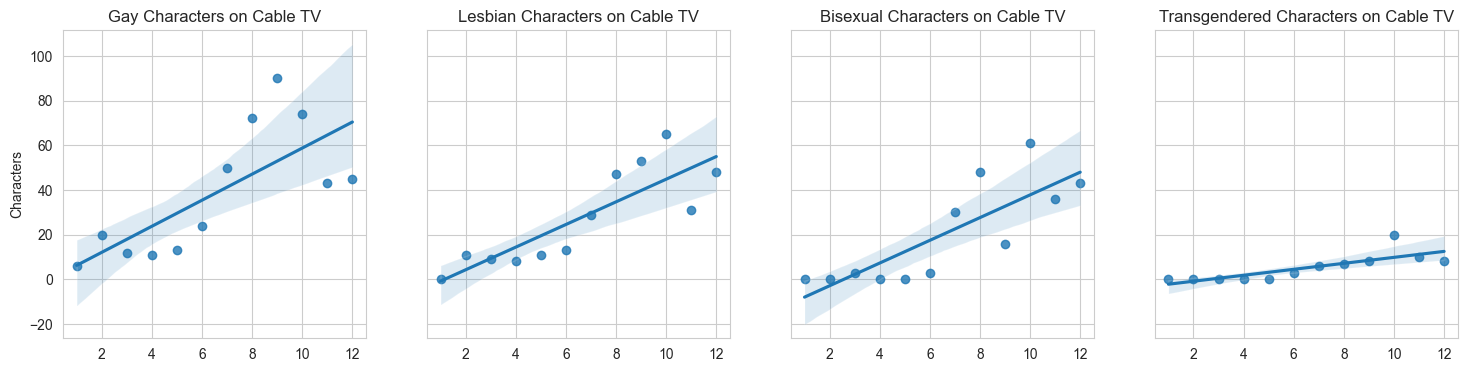

In [218]:
sns.set_style("whitegrid")
fig, axes = plt.subplots(ncols=4,nrows=1, figsize=(18,4), sharey=True)
sns.regplot(x=x, y=y_gay, ax=axes[0]).set(title='Gay Characters on Cable TV', ylabel='Characters')
sns.regplot(x=x, y=y_les, ax=axes[1]).set(title='Lesbian Characters on Cable TV')
sns.regplot(x=x, y=y_bi, ax=axes[2]).set(title='Bisexual Characters on Cable TV')
sns.regplot(x=x, y=y_trans, ax=axes[3]).set(title='Transgendered Characters on Cable TV')

## Predicting

Predicting future years, where:

2022 = 13,

2023 = 14,

2024 = 15,

2025 = 16,

2026 = 17

In [219]:
# Establishing the future years
x_future = [2022, 2023, 2024, 2025, 2026]
x_future = np.array(x_future).reshape(-1,1)
x_future = np.concatenate((np.array(cable['Year']).reshape(-1,1), x_future)).flatten()

# Encoding the future years
encoder = OrdinalEncoder()
x_future_encoded = np.array(x_future).reshape(-1,1).flatten()
x_future_encoded = encoder.fit_transform(x_future_encoded) 

d:\anaconda3\envs\iteso\lib\site-packages\category_encoders\ordinal.py:198: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X[column] = X[column].astype("object").fillna(np.nan).map(col_mapping)
d:\anaconda3\envs\iteso\lib\site-packages\category_encoders\ordinal.py:198: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X[column] = X[column].astype("object").fillna(np.nan).map(col_mapping)


In [220]:
# Predicting the future years
f_gay_pred = model_gay.predict(x_future_encoded).reshape(-1,1).flatten()
f_les_pred = model_les.predict(x_future_encoded).reshape(-1,1).flatten()
f_bi_pred = model_bi.predict(x_future_encoded).reshape(-1,1).flatten()
f_trans_pred = model_trans.predict(x_future_encoded).reshape(-1,1).flatten()

<Axes: title={'center': 'Transgendered Characters on Cable TV'}, xlabel='Year', ylabel='Transgendered'>

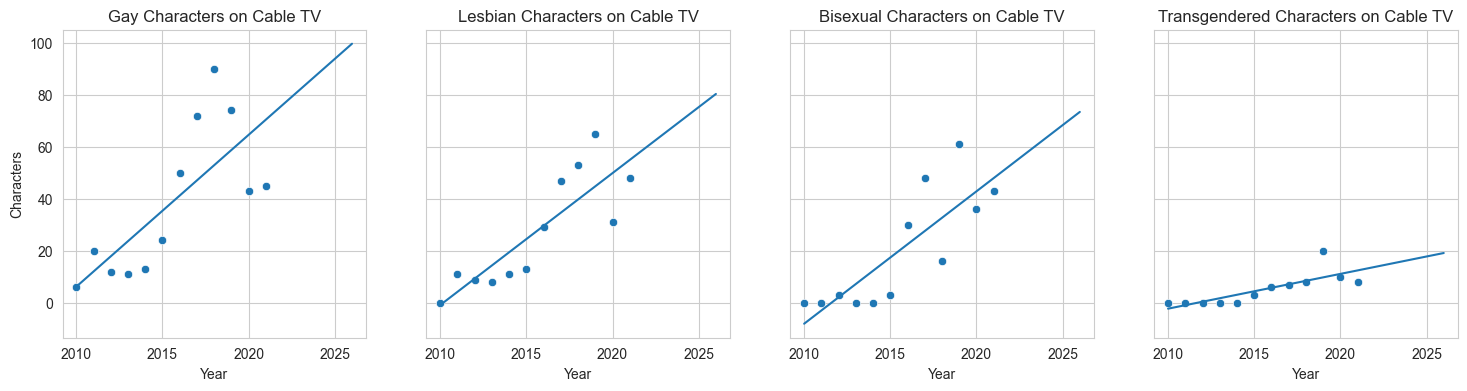

In [221]:
sns.set_style("whitegrid")
fig, axes = plt.subplots(ncols=4,nrows=1, figsize=(18,4), sharey=True)

sns.scatterplot(x=cable["Year"], y=cable["Gay"], ax=axes[0]).set(title='Gay Characters on Cable TV', ylabel='Characters')
sns.lineplot(x=x_future, y=f_gay_pred, ax=axes[0])

sns.lineplot(x=x_future, y=f_les_pred, ax=axes[1]).set(title='Lesbian Characters on Cable TV')
sns.scatterplot(x=cable["Year"], y=cable["Lesbian "], ax=axes[1])

sns.lineplot(x=x_future, y=f_bi_pred, ax=axes[2]).set(title='Bisexual Characters on Cable TV')
sns.scatterplot(x=cable["Year"], y=cable["Bisexual"], ax=axes[2])

sns.lineplot(x=x_future, y=f_trans_pred, ax=axes[3]).set(title='Transgendered Characters on Cable TV')
sns.scatterplot(x=cable["Year"], y=cable["Transgendered"], ax=axes[3])

## Comparison

Predicted for 2022:

In [222]:
f_gay_pred[12].round(), f_les_pred[12].round(), f_bi_pred[12].round(), f_trans_pred[12].round()

(76.0, 60.0, 53.0, 14.0)

GLAAD’s 2022-2023 report:

 46 gay characters, 40 lesbian characters, 39 bisexual characters, 9 trans characters

## Conclusion

The proposed linear regression returns much higher values than the actual reported ones in 2022. 

This is likely due to a bias in the model: although the representation of LGBTQ+ identities in cable TV was high in previous years, it has waned in recent years, which means it will take time for the representation to increase again. 

The linear regression model does not account for this setback, and expects a significant increase in the next years.

# Streaming Services Linear Regression

## Cleaning

In [223]:
# Cleaning and transforming the data 
streaming = df_streaming.T
new_header = streaming.iloc[0] #grab the first row for the header
streaming = streaming[1:] #take the data less the header row
streaming.columns = new_header #set the header row as the df header
streaming = streaming.reset_index()
streaming = streaming.rename(columns={'index':'Year'})

[Text(0.5, 1.0, 'Transgendered Characters on Streaming TV')]

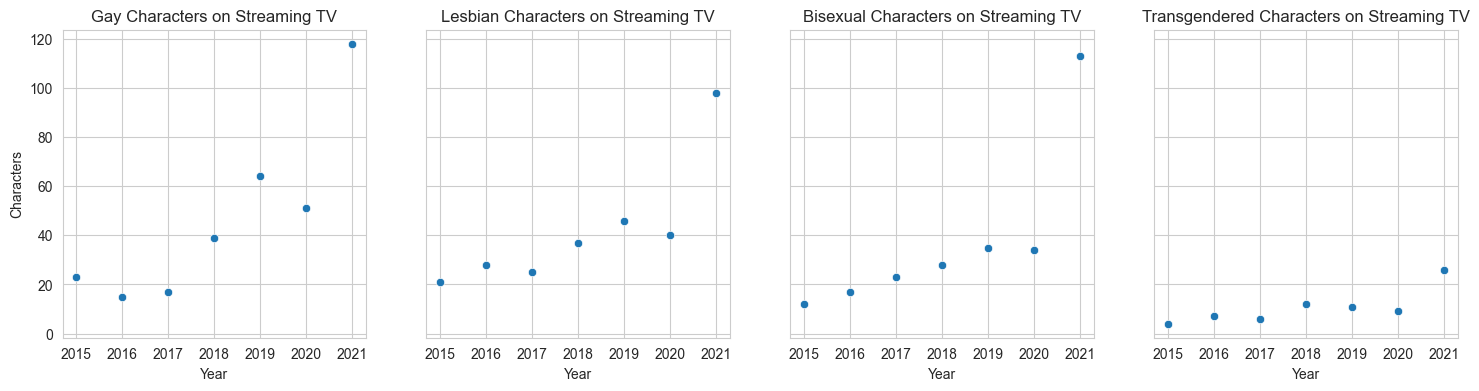

In [224]:
# Plotting the data
sns.set_style("whitegrid")
fig, axes = plt.subplots(ncols=4,nrows=1, figsize=(18,4), sharey=True)
sns.scatterplot(x=streaming["Year"], y=streaming["Gay"], ax=axes[0]).set(title='Gay Characters on Streaming TV', ylabel='Characters')
sns.scatterplot(x=streaming["Year"], y=streaming["Lesbian "], ax=axes[1]).set(title='Lesbian Characters on Streaming TV')
sns.scatterplot(x=streaming["Year"], y=streaming["Bisexual"], ax=axes[2]).set(title='Bisexual Characters on Streaming TV')
sns.scatterplot(x=streaming["Year"], y=streaming["Transgendered"], ax=axes[3]).set(title='Transgendered Characters on Streaming TV')

In [225]:
# Changing the dataset data types
streaming['Year'] = streaming['Year'].astype("object")
streaming['Gay'] = streaming['Gay'].astype("int64")
streaming['Bisexual'] = streaming['Bisexual'].astype("int64")
streaming['Transgendered'] = streaming['Transgendered'].astype("int64")
streaming['Lesbian '] = streaming['Lesbian '].astype("int64")

In [226]:
# Encoding the Year
encoder = OrdinalEncoder()
a = np.array(streaming['Year']).reshape(-1,1)
streaming['Year_encoded'] = encoder.fit_transform(a) 
streaming

d:\anaconda3\envs\iteso\lib\site-packages\category_encoders\ordinal.py:198: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X[column] = X[column].astype("object").fillna(np.nan).map(col_mapping)
d:\anaconda3\envs\iteso\lib\site-packages\category_encoders\ordinal.py:198: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X[column] = X[column].astype("object").fillna(np.nan).map(col_mapping)


Characters,Year,Gay,Lesbian,Bisexual,Transgendered,Year_encoded
0,2015,23,21,12,4,1
1,2016,15,28,17,7,2
2,2017,17,25,23,6,3
3,2018,39,37,28,12,4
4,2019,64,46,35,11,5
5,2020,51,40,34,9,6
6,2021,118,98,113,26,7


## Modeling

Pearson Regression Coefficients for the gay, lesbian, bisexual and transgender characters in relation to time:

In [227]:
r_regression(x, y_gay.ravel()), r_regression(x, y_les.ravel()), r_regression(x, y_bi.ravel()), r_regression(x, y_trans.ravel())

(array([0.73733934]),
 array([0.84812748]),
 array([0.81649735]),
 array([0.79695253]))

The Pearson Coefficients indicate a high to very high linear correlation for all variables. Thus, we can proceed to create the models for each target variable:

In [228]:
# Establishing the x and y’s
x = np.array(streaming["Year_encoded"]).reshape(-1,1)
y_gay = np.array(streaming["Gay"]).reshape(-1,1)
y_les = np.array(streaming["Lesbian "]).reshape(-1,1)
y_bi = np.array(streaming["Bisexual"]).reshape(-1,1)
y_trans = np.array(streaming["Transgendered"]).reshape(-1,1)

In [229]:
model_gay = LinearRegression()
model_gay.fit(x,y_gay)

model_les = LinearRegression()
model_les.fit(x,y_les)

model_bi = LinearRegression()
model_bi.fit(x,y_bi)

model_trans = LinearRegression()
model_trans.fit(x,y_trans)

LinearRegression()

In [230]:
gay_pred = model_gay.predict(x)
les_pred = model_les.predict(x)
bi_pred = model_bi.predict(x)
trans_pred = model_trans.predict(x)

Scores (how well the regression model fits the observed data) for the gay, lesbian, bisexual and transgender characters in cable TV models, in that order:

In [231]:
model_gay.score(x,y_gay), model_les.score(x,y_les), model_bi.score(x,y_bi), model_trans.score(x,y_trans)

(0.7369865982733086,
 0.6624460832057881,
 0.6135699605061659,
 0.6289132379248659)

The scores of these models are higher than the cable ones. Based on the scores, we can expect the gay model to be the best performing one.

Visualizing the proposed models:

[Text(0.5, 1.0, 'Transgendered Characters on Streaming TV')]

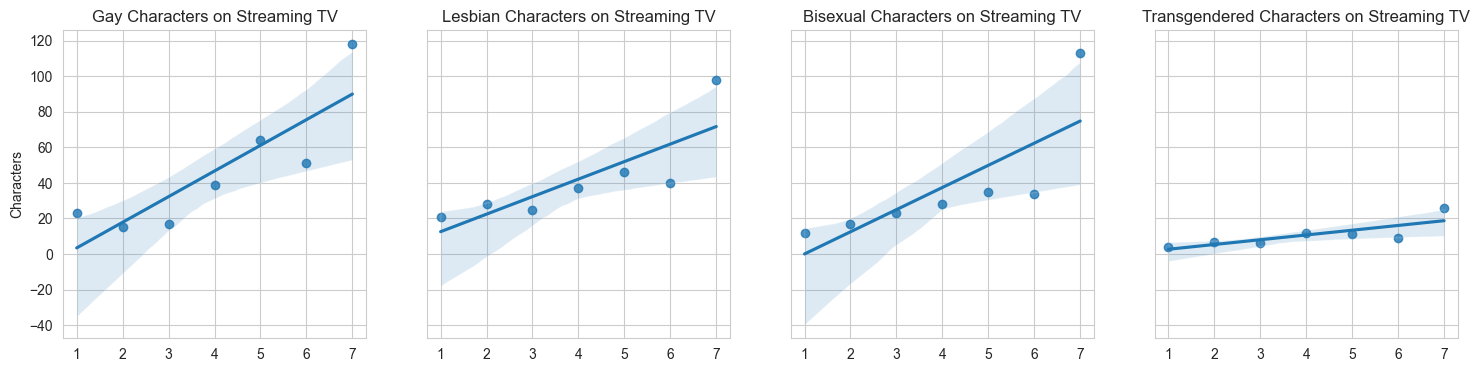

In [232]:
sns.set_style("whitegrid")
fig, axes = plt.subplots(ncols=4,nrows=1, figsize=(18,4), sharey=True)
sns.regplot(x=x, y=y_gay, ax=axes[0]).set(title='Gay Characters on Streaming TV', ylabel='Characters')
sns.regplot(x=x, y=y_les, ax=axes[1]).set(title='Lesbian Characters on Streaming TV')
sns.regplot(x=x, y=y_bi, ax=axes[2]).set(title='Bisexual Characters on Streaming TV')
sns.regplot(x=x, y=y_trans, ax=axes[3]).set(title='Transgendered Characters on Streaming TV')

## Predicting

Predicting future years, where:

2022 = 8,

2023 = 9,

2024 = 10,

2025 = 11,

2026 = 12

In [233]:
# Establishing the future years
x_future = [2022, 2023, 2024, 2025, 2026]
x_future = np.array(x_future).reshape(-1,1)
x_future = np.concatenate((np.array(streaming['Year']).reshape(-1,1), x_future)).flatten()

# Encoding the future years
encoder = OrdinalEncoder()
x_future_encoded = np.array(x_future).reshape(-1,1).flatten()
x_future_encoded = encoder.fit_transform(x_future_encoded) 

d:\anaconda3\envs\iteso\lib\site-packages\category_encoders\ordinal.py:198: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X[column] = X[column].astype("object").fillna(np.nan).map(col_mapping)
d:\anaconda3\envs\iteso\lib\site-packages\category_encoders\ordinal.py:198: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X[column] = X[column].astype("object").fillna(np.nan).map(col_mapping)


In [234]:
# Predicting the future years
f_gay_pred = model_gay.predict(x_future_encoded).reshape(-1,1).flatten()
f_les_pred = model_les.predict(x_future_encoded).reshape(-1,1).flatten()
f_bi_pred = model_bi.predict(x_future_encoded).reshape(-1,1).flatten()
f_trans_pred = model_trans.predict(x_future_encoded).reshape(-1,1).flatten()

<Axes: title={'center': 'Transgendered Characters on Streaming TV'}, xlabel='Year', ylabel='Transgendered'>

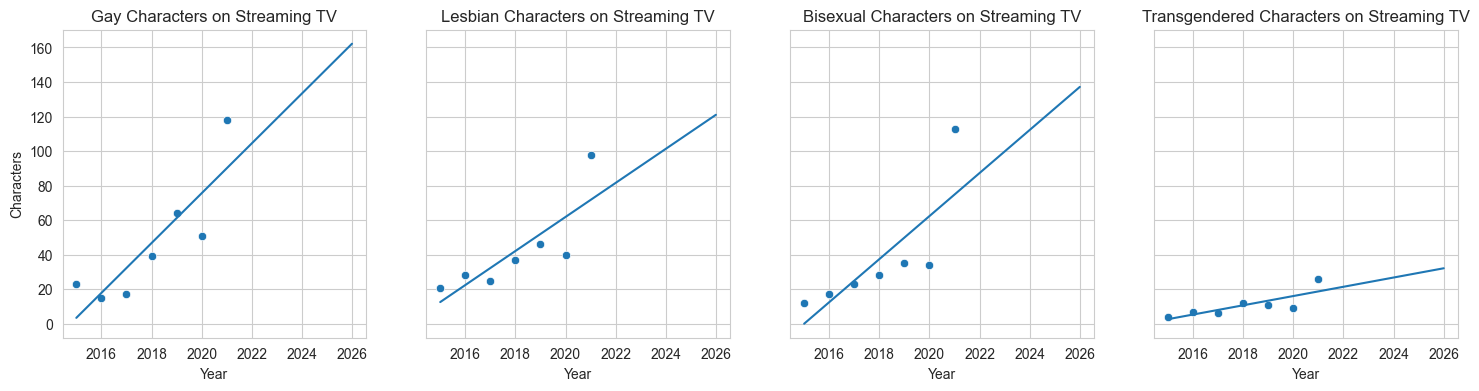

In [235]:
sns.set_style("whitegrid")
fig, axes = plt.subplots(ncols=4,nrows=1, figsize=(18,4), sharey=True)

sns.scatterplot(x=streaming["Year"], y=streaming["Gay"], ax=axes[0]).set(title='Gay Characters on Streaming TV', ylabel='Characters')
sns.lineplot(x=x_future, y=f_gay_pred, ax=axes[0])

sns.lineplot(x=x_future, y=f_les_pred, ax=axes[1]).set(title='Lesbian Characters on Streaming TV')
sns.scatterplot(x=streaming["Year"], y=streaming["Lesbian "], ax=axes[1])

sns.lineplot(x=x_future, y=f_bi_pred, ax=axes[2]).set(title='Bisexual Characters on Streaming TV')
sns.scatterplot(x=streaming["Year"], y=streaming["Bisexual"], ax=axes[2])

sns.lineplot(x=x_future, y=f_trans_pred, ax=axes[3]).set(title='Transgendered Characters on Streaming TV')
sns.scatterplot(x=streaming["Year"], y=streaming["Transgendered"], ax=axes[3])

## Comparison

Predicted for 2022:

In [236]:
f_gay_pred[7].round(), f_les_pred[7].round(), f_bi_pred[7].round(), f_trans_pred[7].round()

(104.0, 82.0, 87.0, 21.0)

GLAAD’s 2022-2023 report:

 130 gay characters, 107 lesbian characters, 84 bisexual characters, 16 trans characters

## Conclusion

This time, the model underpredicted the LGBTQ+ characters, likely because in the last year (2022) sexual diversity on streaming services skyrocketed, and the model had little warning to estimate the representation growth.

Bisexual characters were the best predicted this time, which is surprising since the increase they experienced is by far the most dramatic one.

Trans characters predictions come close to the real numbers in both models, likely because the growth for this identity is not as steep as with the other groups: instead, it’s more gradual, allowing the model to predict accurately the behaviour of the representation.

# Final Notes

Ultimately, both models could be improved, specially the cable one. If anything, the models show how volatile LGBTQ+ representation is on TV, and hints that there may be more factors at play when it comes to it. 